In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import LinearSVR
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [3]:
df = pd.read_csv("cuicides(original).csv")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


In [6]:
df['country'][4:5]

4    Albania
Name: country, dtype: object

In [7]:
print(np.unique(df['age']), np.unique(df['sex']), np.unique(df['generation']))

['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years'] ['female' 'male'] ['Boomers' 'G.I. Generation' 'Generation X' 'Generation Z' 'Millenials'
 'Silent']


In [8]:
rp1 = {'5-14 years': 0, '15-24 years' : 1, '25-34 years': 2, '35-54 years': 3,
       '55-74 years': 4, '75+ years': 5}
rp2 = {'male': 0,'female': 1}
rp3 = {'Albania': 8, 'Antigua and Barbuda' : 28, 'Argentina' : 32, 'Armenia': 51, 'Aruba' : 533,
       'Australia': 36, 'Austria': 40, 'Azerbaijan': 31, 'Bahamas': 44, 'Bahrain': 48,
       'Barbados': 52, 'Belarus': 112, 'Belgium': 56, 'Belize': 84,
       'Bosnia and Herzegovina': 70, 'Brazil': 76, 'Bulgaria': 100, 'Cabo Verde': 132,
       'Canada': 124, 'Chile': 152, 'Colombia': 170, 'Costa Rica': 188, 'Croatia': 191, 'Cuba': 192,
       'Cyprus': 196, 'Czech Republic': 203, 'Denmark': 208, 'Dominica': 212, 'Ecuador': 218,
       'El Salvador': 222, 'Estonia': 233, 'Fiji': 242, 'Finland': 246, 'France': 250, 'Georgia': 268,
       'Germany': 276, 'Greece': 300, 'Grenada': 308, 'Guatemala': 320, 'Guyana': 328, 'Hungary': 348,
       'Iceland': 352, 'Ireland': 372, 'Israel': 376, 'Italy': 380, 'Jamaica': 388, 'Japan': 392,
       'Kazakhstan': 398, 'Kiribati': 296, 'Kuwait': 414, 'Kyrgyzstan': 417, 'Latvia': 428,
       'Lithuania': 440, 'Luxembourg': 442, 'Macau': 446, 'Maldives': 462, 'Malta': 470,
       'Mauritius': 480, 'Mexico': 484, 'Mongolia': 496, 'Montenegro': 499, 'Netherlands': 528,
       'New Zealand': 554, 'Nicaragua': 558, 'Norway': 578, 'Oman': 512, 'Panama': 591, 'Paraguay': 600,
       'Philippines': 608, 'Poland': 616, 'Portugal': 620, 'Puerto Rico': 630, 'Qatar': 634,
       'Republic of Korea': 410, 'Romania': 642, 'Russian Federation': 643,
       'Saint Kitts and Nevis': 659, 'Saint Lucia': 662,
       'Saint Vincent and Grenadines': 670, 'San Marino': 674, 'Serbia': 688,
       'Seychelles': 690, 'Singapore': 702, 'Slovakia': 703, 'Slovenia': 705, 'South Africa': 710,
       'Spain': 724, 'Sri Lanka': 144, 'Suriname': 740, 'Sweden': 752, 'Switzerland': 756,
       'Thailand': 764, 'Trinidad and Tobago': 780, 'Turkey': 792, 'Turkmenistan': 795,
       'Ukraine': 804, 'United Arab Emirates': 784, 'United Kingdom': 826,
       'United States': 840, 'Uruguay': 858, 'Uzbekistan': 860}
rp4 = {'Generation Z': 0, 'Millenials': 1, 'Generation X': 2, 'Boomers': 3,
        'G.I. Generation': 4, 'Silent': 5}
df = df.replace({'age': rp1})
df = df.replace({'sex': rp2})
df = df.replace({'country': rp3})
df = df.replace({'generation': rp4})
df = df.replace('',0)

In [9]:
a = df[' gdp_for_year ($) ']
d = []
c = 0
while c != (len(df)):
    b = a[c][:]
    b = b.replace(",", '')
    b = float(b)
    d.append(b)
    c = c + 1
df[' gdp_for_year ($) '] = d

In [10]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) ']/1000000
df['population'] = df['population']/1000
df.rename(columns={' gdp_for_year ($) ': 'gdp_for_year(mln $)', 'population': 'population (K)'}, inplace=True)

In [11]:
df = df.fillna(0)

In [12]:
df.describe()

,country,year,sex,age,suicides_no,population (K),suicides/100k pop,HDI for year,gdp_for_year(mln $),gdp_per_capita ($),generation
count,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,413.266355,2001.258375,0.500000,2.502876,242.574407,1844.793617,12.816097,0.233483,4.455810e+05,16866.464414,2.747160
std,253.707359,8.469055,0.500009,1.706730,902.047917,3911.779442,18.961511,0.359769,1.453610e+06,18887.576472,1.579865
min,8.000000,1985.000000,0.000000,0.000000,0.000000,0.278000,0.000000,0.000000,4.691963e+01,251.000000,0.000000
25%,196.000000,1995.000000,0.000000,1.000000,3.000000,97.498500,0.920000,0.000000,8.985353e+03,3447.000000,1.000000
50%,398.000000,2002.000000,0.500000,3.000000,25.000000,430.150000,5.990000,0.000000,4.811469e+04,9372.000000,3.000000
75%,642.000000,2008.000000,1.000000,4.000000,131.000000,1486.143250,16.620000,0.677000,2.602024e+05,24874.000000,4.000000
max,860.000000,2016.000000,1.000000,5.000000,22338.000000,43805.214000,224.970000,0.944000,1.812071e+07,126352.000000,5.000000


In [13]:
df = df.drop(['country-year'], axis=1)
df = df.drop(['generation'], axis=1)
df = df[['country',
    'year',
    'sex',
    'suicides_no',
    'population (K)',
    'HDI for year',
    'gdp_for_year(mln $)',
    'gdp_per_capita ($)',
    'suicides/100k pop',
    'age',]]

In [14]:
df

,country,year,sex,suicides_no,population (K),HDI for year,gdp_for_year(mln $),gdp_per_capita ($),suicides/100k pop,age
0,8,1987,0,21,312.900,0.000,2156.624900,796,6.71,1
1,8,1987,0,16,308.000,0.000,2156.624900,796,5.19,3
2,8,1987,1,14,289.700,0.000,2156.624900,796,4.83,1
3,8,1987,0,1,21.800,0.000,2156.624900,796,4.59,5
4,8,1987,0,9,274.300,0.000,2156.624900,796,3.28,2
...,...,...,...,...,...,...,...,...,...,...
27815,860,2014,1,107,3620.833,0.675,63067.077179,2309,2.96,3
27816,860,2014,1,9,348.465,0.675,63067.077179,2309,2.58,5
27817,860,2014,0,60,2762.158,0.675,63067.077179,2309,2.17,0
27818,860,2014,1,44,2631.600,0.675,63067.077179,2309,1.67,0


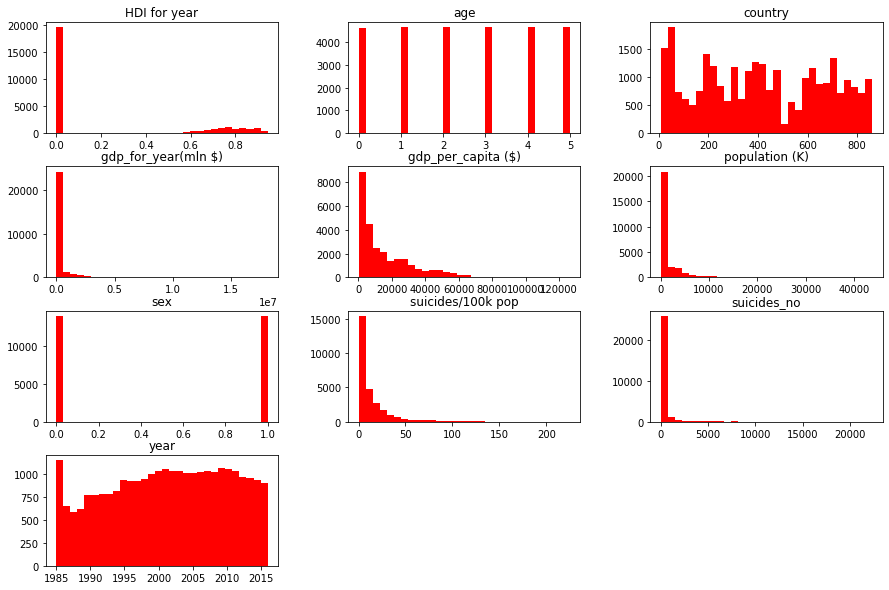

In [15]:
df.hist(color = 'r', bins = 30, figsize=(15,10), grid = False)
plt.show()

In [16]:
df = np.array(df)
df

array([[8.000e+00, 1.987e+03, 0.000e+00, ..., 7.960e+02, 6.710e+00,
        1.000e+00],
       [8.000e+00, 1.987e+03, 0.000e+00, ..., 7.960e+02, 5.190e+00,
        3.000e+00],
       [8.000e+00, 1.987e+03, 1.000e+00, ..., 7.960e+02, 4.830e+00,
        1.000e+00],
       ...,
       [8.600e+02, 2.014e+03, 0.000e+00, ..., 2.309e+03, 2.170e+00,
        0.000e+00],
       [8.600e+02, 2.014e+03, 1.000e+00, ..., 2.309e+03, 1.670e+00,
        0.000e+00],
       [8.600e+02, 2.014e+03, 1.000e+00, ..., 2.309e+03, 1.460e+00,
        4.000e+00]])

In [17]:
transformer = Normalizer(norm='max', copy=True).fit(df)
df = transformer.transform(df)

In [18]:
X = np.array(df)
Y = np.array(df)

In [19]:
X_train, X_pred, Y_train, Y_pred = train_test_split(X, Y, test_size=0.2, random_state=0)

In [20]:
X_train = X_train[:,:-1]
X_pred = X_pred[:,:-1]
Y_train = Y_train[:,-1:]
Y_pred = Y_pred[:,-1:]

In [21]:
#scaler = StandardScaler().fit(X_train)
#standard_X_train = scaler.transform(X_train)
#standard_X_pred = scaler.transform(X_pred)

In [22]:
LR = LinearRegression(n_jobs=-1)

In [23]:
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [24]:
prediction_LR = LR.predict(X_pred)
prediction_LR

array([[-3.45144479e-05],
       [ 7.08300043e-05],
       [ 2.32746970e-05],
       ...,
       [ 5.94896276e-05],
       [ 3.62758173e-05],
       [ 6.57467842e-04]])

In [25]:
mean_absolute_error(Y_pred, prediction_LR)

0.00010951198978995826

In [26]:
mean_squared_error(Y_pred, prediction_LR)

4.7104079343840165e-08

In [27]:
r2_score(Y_pred, prediction_LR)

0.6436943608962051

In [28]:
MLPR = MLPRegressor(max_iter = 750, hidden_layer_sizes=(100, 50, 100  ))

In [29]:
MLPR.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=750, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
prediction_MLPR = MLPR.predict(X_pred)
prediction_MLPR

array([ 5.41669113e-05,  2.09029811e-04, -2.24988713e-05, ...,
        5.40013090e-05, -6.77973744e-05,  1.90513210e-03])

In [31]:
mean_absolute_error(Y_pred, prediction_MLPR)

0.00019447962237537826

In [32]:
mean_squared_error(Y_pred, prediction_MLPR)

1.5115132767734906e-07

In [33]:
r2_score(Y_pred, prediction_MLPR)

-0.14334196018009582

In [34]:
LSVR = LinearSVR(random_state=0, tol=1e-5, max_iter=1250)

In [35]:
LSVR.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1250,
          random_state=0, tol=1e-05, verbose=0)

In [36]:
prediction_LSVR = LSVR.predict(X_pred)
prediction_LSVR

array([-1.86031254e-05,  1.65180219e-05,  2.26223053e-05, ...,
        4.80727644e-05,  6.56670256e-06,  7.38618556e-04])

In [37]:
mean_absolute_error(Y_pred, prediction_LSVR)

0.00010937281119615476

In [38]:
mean_squared_error(Y_pred, prediction_LSVR)

5.134396987137584e-08

In [39]:
r2_score(Y_pred, prediction_LSVR)

0.6116228943653286

In [40]:
RNR = RadiusNeighborsRegressor(radius=0.0625, n_jobs=-1)

In [41]:
RNR.fit(X_train, Y_train)

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=-1, p=2, radius=0.0625,
                         weights='uniform')

In [42]:
prediction_RNR = RNR.predict(X_pred)
prediction_RNR

array([[1.08347036e-05],
       [7.08395362e-05],
       [8.60251919e-06],
       ...,
       [2.60707899e-05],
       [2.55355249e-05],
       [1.23312204e-03]])

In [43]:
mean_absolute_error(Y_pred, prediction_RNR)

9.840056853050138e-05

In [44]:
mean_squared_error(Y_pred, prediction_RNR)

4.42819866585494e-08

In [45]:
r2_score(Y_pred, prediction_RNR)

0.6650412920293398

In [46]:
KNR = KNeighborsRegressor(n_neighbors=3, leaf_size=50, n_jobs=-1)

In [47]:
KNR.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=50, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                    weights='uniform')

In [48]:
prediction_KNR = KNR.predict(X_pred)
prediction_KNR

array([[2.38614784e-05],
       [7.03753171e-05],
       [4.19606271e-06],
       ...,
       [7.21506377e-05],
       [1.57244898e-05],
       [1.24179758e-03]])

In [49]:
mean_absolute_error(Y_pred, prediction_KNR)

6.784697010412065e-05

In [50]:
mean_squared_error(Y_pred, prediction_KNR)

2.5198774832288787e-08

In [51]:
r2_score(Y_pred, prediction_KNR)

0.8093909127124168

In [52]:
ETR = ExtraTreeRegressor(random_state=0).fit(X_train, Y_train)
ETR.score(X_pred, Y_pred)

0.7525106234537337

In [53]:
prediction_ETR = ETR.predict(X_pred)
prediction_ETR

array([5.49914177e-05, 5.49914177e-05, 5.49914177e-05, ...,
       5.49914177e-05, 5.49914177e-05, 0.00000000e+00])

In [54]:
mean_absolute_error(Y_pred, prediction_ETR)

0.00010406571933085072

In [55]:
mean_squared_error(Y_pred, prediction_ETR)

3.2718424717933974e-08

In [56]:
r2_score(Y_pred, prediction_ETR)

0.7525106234537337

In [57]:
BR = BaggingRegressor(ETR, random_state=0).fit(X_train, Y_train)
BR.score(X_pred, Y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.7361232421693575

In [58]:
prediction_BR = BR.predict(X_pred)
prediction_BR

array([9.55189025e-05, 9.55189025e-05, 9.55189025e-05, ...,
       9.55189025e-05, 9.55189025e-05, 3.40643047e-04])

In [59]:
mean_absolute_error(Y_pred, prediction_BR)

0.00012465613951437432

In [60]:
mean_squared_error(Y_pred, prediction_BR)

3.48848583174655e-08

In [61]:
r2_score(Y_pred, prediction_BR)

0.7361232421693575